# Использование генераторов псевдослучайных чисел

Начнём рассмотрение вопроса с помощью стандартного модуля [`random`](https://docs.python.org/3/library/random.html).
Абсолютно всю информацию о нём вы найдёте в официальной документации.

## Основы

Импортируем модуль:

In [1]:
import random as rand

Сгенерируем 5 псевдослучайных чисел (ПСЧ):

In [2]:
for _ in range(5):
    print(rand.random())

0.6303693184458115
0.6452507189338954
0.4469935061688656
0.34406253582438884
0.4680908154895286


Функция `random()` генерирует ПСЧ, распределённое равномерно на полуотрезке [0, 1).

```{note}
Запустив этот код несколько раз, вы заметите, что каждый раз получаете различный результат.
Ниже приведён тот же код, однако результат отличается.
```

In [3]:
for _ in range(5):
    print(rand.random())

0.5434594321830499
0.47074026414922443
0.1000773179197263
0.30575432236180045
0.028153889143550548


### Состояние генератора

На самом деле в предыдущем примере мы вызвали не _функцию_ `random()`, а _метод_ `random()` _экземпляра_ класса `Random`.
Конкретный экземпляр класса `Random` имеет определённое _состояние_, которое по умолчанию случайно, но может определяется параметром `seed` (на русский часто переводится как "затравка") или методом `setstate(...)` в любой момент работы программы.

Повторим предыдущий пример, задав определённое значение `seed`:

In [4]:
# Затравка может быть любым целым числом.
# Рекомендуют назначать его очень большим числом,
# чтобы уменьшить вероятность совпадения затравок,
# назначенных разными людьми
rand.seed(1700077)
for _ in range(5):
    print(rand.random())

0.7020746348844183
0.6233161107388304
0.12425768533206094
0.29613478392527026
0.5273751569843022


И ещё раз выполним этот же код:

In [5]:
rand.seed(1700077)
for _ in range(5):
    print(rand.random())

0.7020746348844183
0.6233161107388304
0.12425768533206094
0.29613478392527026
0.5273751569843022


Сколько бы раз мы не запустили код, мы будем получать одну и ту же последовательность значений.
Таким образом наглядно показано свойство обеспечения воспроизводимости результатов ГПСЧ.

Изменим затравку - получим другой результат:

In [6]:
rand.seed(777)
for _ in range(5):
    print(rand.random())

0.22933408950153078
0.44559617334521107
0.36859824937216046
0.269835098321503
0.3361436466700177


Но теперь этот результат всё так же от запуска к запуску будет повторяться:

In [7]:
rand.seed(777)
for _ in range(5):
    print(rand.random())

0.22933408950153078
0.44559617334521107
0.36859824937216046
0.269835098321503
0.3361436466700177


Рассмотрим пример, показывающий неудобство использования метода `seed()` напрямую.

Пусть есть две функции, использующие внутри себя ГПСЧ, причём получают ПСЧ, распределённое по одинаковым законам.
Пусть, например, функция `f()` генерирует ПСЧ, используя `random()`.
То же делает и функция `g()`:

In [8]:
def f():
    return rand.random()

def g():
    return rand.random()

Вызовем последовательно эти функции:

In [9]:
print(f(), g())

0.7523163560031157 0.9226950812763804


При каждом запуске получаем разные результаты.
Но попробуем реализовать возможность воспроизведения результатов.
Для этого вызовем `seed(...)` в глобальной области видимости:

In [10]:
rand.seed(666)
print(f(), g())

0.45611964897696833 0.9033231539802643


Мы добились своего - результат от запуска к запуску не меняется.
Заметим ещё одно, а именно то, что результат не изменится, если мы поменяем местами вызовы функций:

In [11]:
rand.seed(666)
print(g(), f())

0.45611964897696833 0.9033231539802643


```{note}
Заметьте, в каждой ячейке мы должны вызвать `seed(...)`, чтобы каждый раз переустанавливать ГПСЧ в начальное состояние.
В противном случае будут генерироваться новые случайные числа, которые тем не менее всё так же воспроизводимы.
Иными словами, если после вызова `seed(...)` мы сгенерировали $m$ чисел, то при повторном запуске для генерации $n$ чисел, $n > m$, будут сгенерированы те же самые $m$ чисел, плюс $n - m$ новых чисел.
```

Убедимся в этом так.
Опишем функцию генерации заданного количества ПСЧ:

In [12]:
def gen_randoms(n):
    return [
        rand.random() for _ in range(n)
    ]

И вызовем её для генерации сначала трёх, а затем двух чисел:

In [13]:
rand.seed(2023)
# Три случайных числа
print(gen_randoms(3))
# плюс два новых случайных числа
print(gen_randoms(2))

[0.3829219244542088, 0.9718620884907823, 0.8438174232038365]
[0.32028063842069, 0.5710257361341048]


А теперь сбросим ГПСЧ в то же самое начальное состояние и сгенерируем сразу пять чисел.
В результате должна получиться та же самая последовательность ПСЧ:

In [14]:
rand.seed(2023)
print(gen_randoms(5))

[0.3829219244542088, 0.9718620884907823, 0.8438174232038365, 0.32028063842069, 0.5710257361341048]


Как видите, результат полностью предсказуем.

```{note}
Параметр `seed(...)` является глобальным.
В программах, состоящих из нескольких модулей, это может стать проблемой.
```

В реальных программах со множеством модулей и большим объёмом кода рассмотренный подход имеет некоторые недостатки.
В ряде задач, например, может потребоваться ГПСЧ, способный корректно работать в условиях параллельных вычислений.
В условиях модульности программы может быть удобнее передавать между функциями и объектами экземпляры генератора.

Существует удобный способ справиться с описанными проблемами - создание экземпляра ГПСЧ определённого типа и с заданным состоянием.
Например, так:

In [15]:
rg = rand.Random(2023)
# Переданный параметр по сути своей есть seed

Наш экзепляр ГПСЧ `rg` имеет все те же методы и возможности, что есть в модуле `random`, который мы использовали под псевдонимом `rand`.
Перепишем нашу функцию `gen_randoms(...)` следующим образом:

In [16]:
def gen_randoms(n, rg):
    # Параметр rg - объект ГПСЧ
    return [
        rg.random() for _ in range(n)
    ]

Теперь, помимо количества генерируемых чисел, функция принимает на вход объект ГПСЧ `rg`.
Сгенерируем пять чисел:

In [17]:
print(gen_randoms(5, rg))

[0.3829219244542088, 0.9718620884907823, 0.8438174232038365, 0.32028063842069, 0.5710257361341048]


Как видите, результат тот же, что и раньше при `seed = 2023`.

### Визуализация распределений

Для визуализации случайных чисел часто используется гистограмма.
Подключим matplotlib, сформируем два массива ПСЧ для двух разных распределений и построим их гистограммы.
При формировании массивов воспользуемся методами `normalvariate(...)` (нормальное распределение) и `uniform(...)` (равномерное распределение) нашего экземпляра ГПСЧ `rg`.

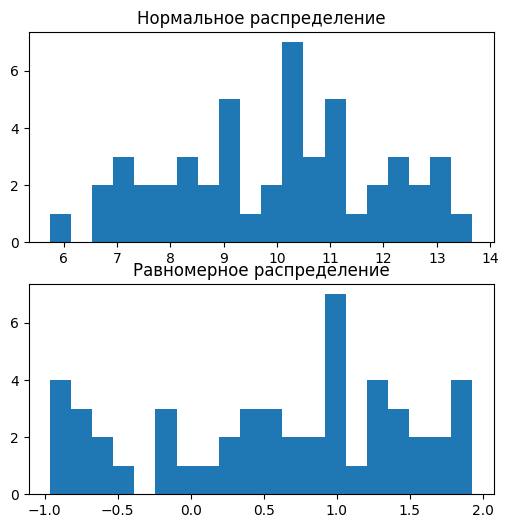

In [18]:
import matplotlib.pyplot as plt

# Сформируем массивы по 50 элементов
N1 = 50
norm1 = [
    # mu - математическое ожидание
    # sigma - среднее квадратическое отклонение
    rg.normalvariate(mu=10, sigma=2)
    for _ in range(N1)
]
uniform1 = [
    rg.uniform(-1, 2)
    for _ in range(N1)
]

fig, (ax1, ax2) = plt.subplots(
    figsize=(6, 6), nrows=2
)
ax1.hist(norm1, bins=20)
ax1.set_title("Нормальное распределение")
ax2.hist(uniform1, bins=20)
ax2.set_title("Равномерное распределение");

Увеличим число точек в 20 раз:

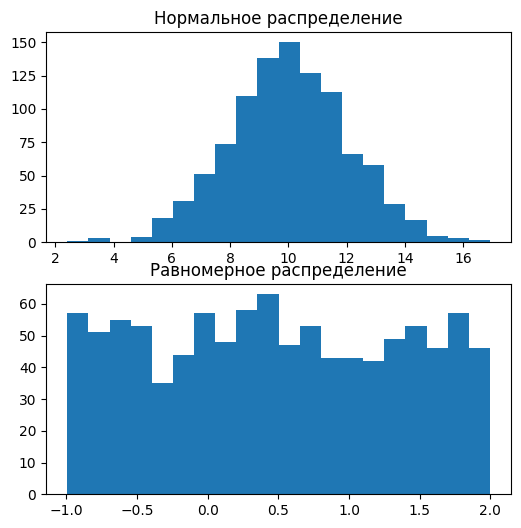

In [19]:
N2 = N1 * 20
norm2 = [
    rg.normalvariate(mu=10, sigma=2)
    for _ in range(N2)
]
uniform2 = [
    rg.uniform(-1, 2)
    for _ in range(N2)
]

fig, (ax1, ax2) = plt.subplots(
    figsize=(6, 6), nrows=2
)
ax1.hist(norm2, bins=20)
ax1.set_title("Нормальное распределение")
ax2.hist(uniform2, bins=20)
ax2.set_title("Равномерное распределение");

Как видите, при увеличении количества ПСЧ гистограммы принимают всё более чёткие очертания конкретного распределения.

Функциональность стандартного `random` уже достаточна для моделирования различных стохастических процессов.
Однако в ряде случаев более удобно пользоваться `random`'ом из библиотеки NumPy.

## Использование NumPy

Функционал `numpy.random` полностью аналогичен `random`'у стандартной библиотеки.
Так как вся библиотека NumPy заточена под работу с массивами, методы `numpy.random` так же способны генерировать не одно число за раз, а сразу весь массив, матрицу или тензор заданного размера.
И здесь также есть возможность пользоваться как неявно созданным экземпляром `Generator`, так и его явно созданным экземпляром.
Создать генератор можно так:

In [20]:
import numpy.random as nprand

# Генератор по умолчанию с состоянием по затравке
rg = nprand.default_rng(seed=1234567)

Сразу сгенерируем два массива чисел, распределённых по нормальному и экспоненциальному законам:

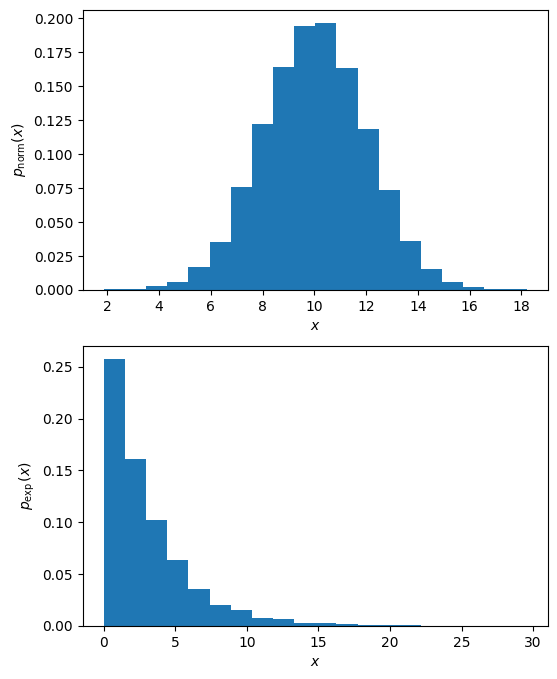

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(6, 8))
# density=True создаёт гистограмму плотности,
# по смыслу соответствующую функции плотности вероятности
# - нормальное
ax1.hist(
    rg.normal(loc=10, scale=2, size=10_000),
    bins=20,
    density=True
)
ax1.set(xlabel="$x$", ylabel=r"$p_{\mathrm{norm}}(x)$");
# - экспоненциальное
ax2.hist(
    rg.exponential(scale=3, size=10_000),
    bins=20,
    density=True
)
ax2.set(xlabel="$x$", ylabel=r"$p_{\exp}(x)$");

Мы сразу создали массив из 10000 элементов, указав параметр `size=10000`.
Если `size` не указать, то будет возвращено одно число.

```{note}
Названия некоторых методов отличаются от тех же функций в стандартном `random`'ме.
Отличаются и имена параметров функций.
В данном случае параметры `loc` и `scale` аналогичны `mu` и `sigma` (математическое ожидание и стандартное отклонение).
```

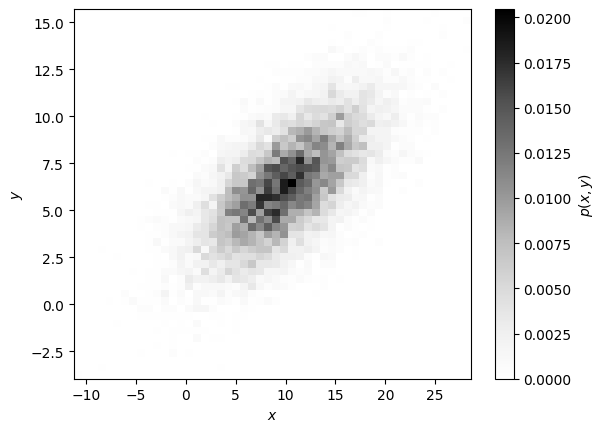

In [22]:
fig, ax = plt.subplots()
x = rg.normal(10, 5, 10_000)
# Пусть y коррелирует с x
y = rg.normal(3, 2, 10_000) + x/3
img = ax.hist2d(x, y, bins=50, cmap="Greys", density=True)[-1]
fig.colorbar(img, ax=ax, label="$p(x, y)$")
ax.set(xlabel="$x$", ylabel="$y$");

Случайную матрицу можно создать, передав в качестве `size` несколько значений:

In [23]:
# По умолчанию loc=0 и scale=1
rg.normal(size=(3, 4))

array([[ 0.69846709,  0.90365082, -0.5550185 , -1.46088558],
       [ 0.58470831, -0.52951617,  1.83950789, -1.22445878],
       [ 0.25354375,  1.13745529, -0.44677438, -0.73421339]])

Естественно, при одном и том же `seed` будет один и тот же результат и для чисел, и для массивов любой формы:

In [29]:
rg = nprand.default_rng(98765)
rg.exponential(size=(3, 4))

array([[0.02466916, 1.44229712, 0.96453594, 1.16304798],
       [0.22589411, 2.33248878, 1.33913539, 0.17395315],
       [0.73634616, 1.14181883, 1.27708772, 0.36814741]])

In [30]:
rg = nprand.default_rng(98765)
rg.exponential(size=(3, 4))

array([[0.02466916, 1.44229712, 0.96453594, 1.16304798],
       [0.22589411, 2.33248878, 1.33913539, 0.17395315],
       [0.73634616, 1.14181883, 1.27708772, 0.36814741]])

Одним из преимуществ `numpy.random` является возможность использования ГПСЧ в параллельных процессах.
Эта возможность обеспечивается за счёт [`SeedSequence`](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence).

## См. также

1. [`SeedSequence`](https://numpy.org/doc/stable/reference/random/parallel.html) для применения ГПСЧ в параллельных вычислениях.
2. Основы генерации ПСЧ можно найти в учебнике ["Имитационное моделирование"](https://bmstu.press/catalog/item/3020).
3. Книга ["Python для сложных задач"](https://www.ozon.ru/product/python-dlya-slozhnyh-zadach-nauka-o-dannyh-i-mashinnoe-obuchenie-vander-plas-dzh-767959620/?sh=45JSWf1qvw).
4. Под визуализацию статистических данных заточена библиотека [seaborn](https://seaborn.pydata.org/).
5. Документация [`numpy.random`](https://numpy.org/doc/stable/reference/random/index.html).
6. Генераторы NumPy основаны на низкоуровневых генераторах ПСЧ, которые называются [`Bit Generators`](https://numpy.org/doc/stable/reference/random/bit_generators/index.html).
   В документации на них можно найти полный список конкретных генераторов.
   Тогда вместо `nprand.default_rng(...)`, создающего по умолчанию битовый генератор PCG64, можно, например, создать ГПСЧ с битовым генератором SFC64: `nprand.Generator(nprand.SFC64())`.
7. Документация стандартного [`random`](https://docs.python.org/3/library/random.html).